**LOADING PACKAGES**

In [1]:
import pandas as pd
from scripts import GetData, SentimentPrediction, Visualization, Preprocessing, GraphAnalysis
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import numpy as np
from operator import itemgetter
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth",None)

**COLLECT TWEETS AND EXPLORATION**

- GET DATA

In [2]:
path = "Data/"
df = GetData(path).retrieve_tweets()

## Keep tweets related to Covid since January 2020
df = df[df["date"]>="2020-01-01"]
df.head(2)

,index,country,id_str,created_at,full_text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_screen_name,retweet_count,retweeted,lang,original_tweet_id,original_text,date
199,1759500,MSPS_Togo,1214940845368999936,2020-01-08 16:04:04,Middle East respiratory syndrome coronavirus (MERS-CoV) – The United Arab Emirates https://t.co/KRZDK2jzfS https://t.co/TGHWAWUSXP,dlvr.it,False,NaN,NaN,NaN,0,False,en,NaN,NaN,2020-01-08
200,3385396,health_malawi,1215225121021054977,2020-01-09 10:53:41,RT @WHOWPRO: Chinese authorities have made a preliminary determination of the cause of #pneumonia in Wuhan as a novel (new) #coronavirus. @…,Twitter Web App,False,NaN,NaN,NaN,177,False,en,1.215167e+18,Chinese authorities have made a preliminary determination of the cause of #pneumonia in Wuhan as a novel (new) #coronavirus. @WHO continues to monitor the situation closely and is ready to support #China to investigate and respond to this outbreak. https://t.co/0zR6iZWrcm (1/7),2020-01-09


- EXPLORATION AND VIZUALISATION

In [3]:
## Shape of our data
df.shape

(143460, 16)

In [4]:
## Date range of our data
print("Début d'émission des tweets sur le covid : {debut} | Fin de collecte de ces tweets : {fin}".\
      format(debut=df["date"].min(),fin=df["date"].max()))

Début d'émission des tweets sur le covid : 2020-01-08 00:00:00 | Fin de collecte de ces tweets : 2021-02-24 00:00:00


Text(0.5, 0, 'Date')

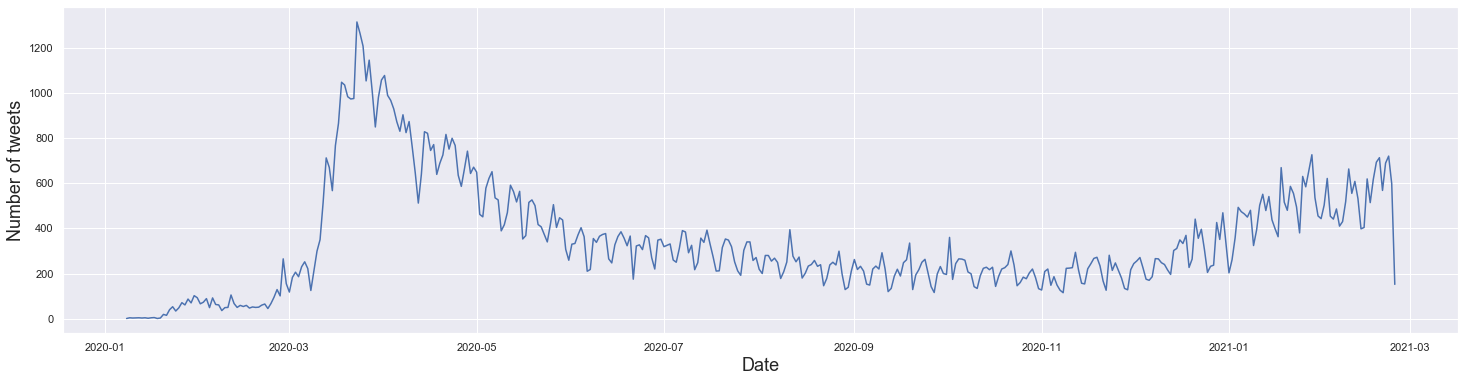

In [5]:
## Tweet's number evolution
fig_dims = (25, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.plot(df['date'].value_counts().sort_index())
plt.ylabel("Number of tweets",fontsize=18)
plt.xlabel("Date",fontsize=18)

- PREPROCESSING

In [3]:
## Filter English and French Corpus & Remove stop words
df = df[df["lang"].isin(["en","fr"])]

lst_words = ["rt","amp","@","http"]
preproc = Preprocessing(df, lst_words)

df = preproc.remove_some_words()
df.head(2)

,index,country,id_str,created_at,full_text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_screen_name,retweet_count,retweeted,lang,original_tweet_id,original_text,date
199,1759500,MSPS_Togo,1214940845368999936,2020-01-08 16:04:04,middle east respiratory syndrome coronavirus merscov – united arab emirates httpstcokrzdk2jzfs httpstcotghwawusxp,dlvr.it,False,NaN,NaN,NaN,0,False,en,NaN,NaN,2020-01-08
200,3385396,health_malawi,1215225121021054977,2020-01-09 10:53:41,whowpro chinese authorities made preliminary determination cause pneumonia wuhan novel new coronavirus …,Twitter Web App,False,NaN,NaN,NaN,177,False,en,1.215167e+18,Chinese authorities have made a preliminary determination of the cause of #pneumonia in Wuhan as a novel (new) #coronavirus. @WHO continues to monitor the situation closely and is ready to support #China to investigate and respond to this outbreak. https://t.co/0zR6iZWrcm (1/7),2020-01-09


In [ ]:
## Translate french tweets to english with google translate API

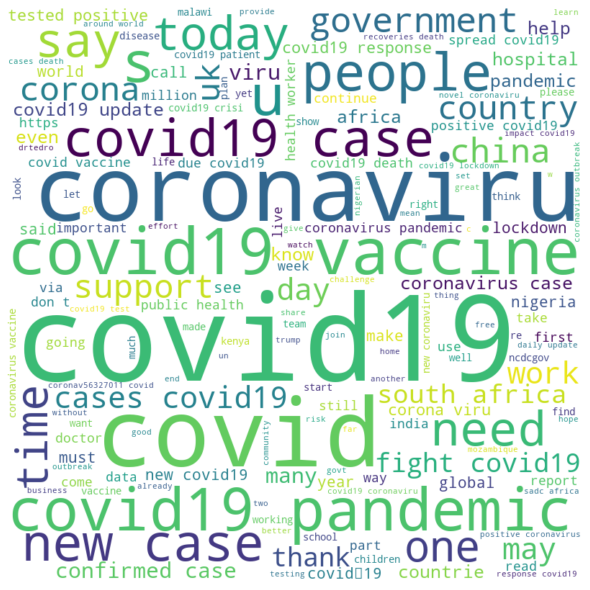

In [4]:
## Word Cloud for English corpus
dataviz = Visualization(df,"en")
dataviz.word_cloud()

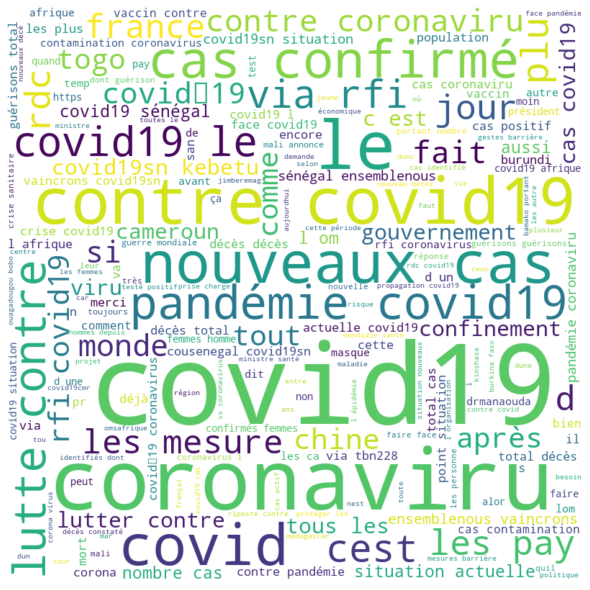

In [5]:
## Word Cloud for French corpus
dataviz = Visualization(df,"fr")
dataviz.word_cloud()

**Preprocessing**

**SENTIMENT PREDICTION**

- VADER

In [9]:
df_english = df[df["lang"]=="en"][["country","id_str","date","full_text"]]

In [10]:
df_english = SentimentPrediction(df_english).vader_prediction()
df_english.head()

,country,id_str,date,full_text,compound,sentiment
203,OMS Region Africaine,1215038235954401280,2020-01-08,helenbranswell took earlier tweet wasnt clear enough confirming chinese authorities think new coronavirus —…,-0.2924,Negative
204,OMS Region Africaine,1215162273712394241,2020-01-09,crof china confirms new coronavirus investigates mystery wuhan illness pneumonia,-0.4019,Negative
205,OMS Ouest Africain,1215243578873696256,2020-01-09,helenbranswell took earlier tweet wasnt clear enough confirming chinese authorities think new coronavirus —…,-0.2924,Negative
206,Malawi,1215225121021054977,2020-01-09,whowpro chinese authorities made preliminary determination cause pneumonia wuhan novel new coronavirus …,0.6124,Positive
207,OMS Region Africaine,1215387643904577536,2020-01-09,helenbranswell recovery new coronavirus wuhan pneumonia patients mean outbreak long s…,0.0000,Neutral


In [11]:
df_english["sentiment"].value_counts()

Positive    54222
Neutral     39000
Negative    35270
Name: sentiment, dtype: int64

Text(0.5, 0, 'Date')

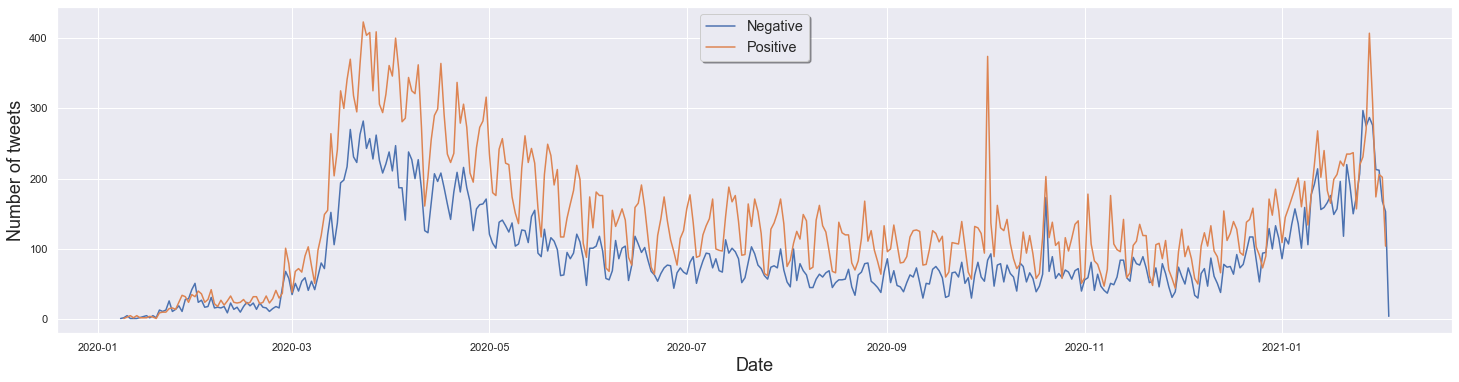

In [12]:
## Evolution temporelle de la polarité
fig_dims = (25, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.plot(df_english[df_english["sentiment"]=="Negative"]['date'].value_counts().sort_index(),label='Negative')
plt.plot(df_english[df_english["sentiment"]=="Positive"]['date'].value_counts().sort_index(),label='Positive')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.ylabel("Number of tweets",fontsize=18)
plt.xlabel("Date",fontsize=18)

In [13]:
positive_tweets, negative_tweets = df_english[df_english["sentiment"]=="Positive"], \
                                    df_english[df_english["sentiment"]=="Negative"]

In [14]:
positive_tweets.head(20)

,country,id_str,date,full_text,compound,sentiment
206,Malawi,1215225121021054977,2020-01-09,whowpro chinese authorities made preliminary determination cause pneumonia wuhan novel new coronavirus …,0.6124,Positive
217,OMS Region Africaine,1216109647637221376,2020-01-11,nycbat rapid phylogenetic analysis novel wuhan china human coronavirus shows definitely clusters sarsrelated cov clad…,0.6124,Positive
218,OMS Region Africaine,1215830956503900162,2020-01-11,bactiman63 china pneumonia outbreak novel coronavirus,0.3182,Positive
220,Zambie,1215940691739729920,2020-01-11,new interim guidance range topics help countries manage new coronavirus 👉🏼,0.4019,Positive
222,Malawi,1215916745325793280,2020-01-11,new interim guidance range topics help countries manage new coronavirus 👉🏼,0.4019,Positive
223,Zambie,1215918172475404288,2020-01-11,new interim guidance range topics help countries manage new coronavirus 👉🏼,0.4019,Positive
224,Rwanda,1216297213833482240,2020-01-12,peterdaszak humefield important information released china wuhan coronavirus βcov lineage b distant th…,0.2023,Positive
225,OMS Region Africaine,1216186974857392128,2020-01-12,helenbranswell important information wuhan also important know coronavirus sarslike could potentially cause sars…,0.3818,Positive
227,Malawi,1216588658926661633,2020-01-13,breaking received genetic sequences novel coronavirus 2019ncov chinese authorities expect th…,0.3182,Positive
228,OMS Region Africaine,1216720118777909248,2020-01-13,whothailand whosearo whowpro given developments novel coronavirus 2019nc0v directorgeneral drtedros co…,0.3182,Positive


In [15]:
negative_tweets.head(20)

,country,id_str,date,full_text,compound,sentiment
203,OMS Region Africaine,1215038235954401280,2020-01-08,helenbranswell took earlier tweet wasnt clear enough confirming chinese authorities think new coronavirus —…,-0.2924,Negative
204,OMS Region Africaine,1215162273712394241,2020-01-09,crof china confirms new coronavirus investigates mystery wuhan illness pneumonia,-0.4019,Negative
205,OMS Ouest Africain,1215243578873696256,2020-01-09,helenbranswell took earlier tweet wasnt clear enough confirming chinese authorities think new coronavirus —…,-0.2924,Negative
208,OMS Region Africaine,1215689378560798720,2020-01-10,healthmap china mystery illness likely due new coronavirus,-0.4019,Negative
209,OMS Ouest Africain,1215681257713078278,2020-01-10,coronaviruses large family viruses known cause illness ranging common cold severe diseases…,-0.6486,Negative
210,Zambie,1215698429738913794,2020-01-10,protect reduce risk coronavirus infection 👏🏽hand hygiene 🤧cover mouth nose coughing sneezing 🥩thoroughl…,-0.1531,Negative
211,Republic Democratique du Congo,1215528646540087297,2020-01-10,whowpro protect reduce risk coronavirus infection 👏🏽hand hygiene 🤧cover mouth nose coughing sneezing 🥩thoro…,-0.1531,Negative
214,Côte d'Ivoire,1215424946308046849,2020-01-10,protect reduce risk coronavirus infection 👏🏽hand hygiene 🤧cover mouth nose coughing sneezing 🥩thoroughl…,-0.1531,Negative
219,Zambie,1215941917273395201,2020-01-11,providing information countries prepare new coronavirus incl 🌡 monitor sick people 🔬 te…,-0.5106,Negative
226,OMS Region Africaine,1216187178599862272,2020-01-12,helenbranswell critical china rest us dont assume theyve stopped transmission new sarslike coronavi…,-0.1615,Negative


**GRAPH MINING**

In [3]:
df.head(2)

,index,country,id_str,created_at,full_text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_screen_name,retweet_count,retweeted,lang,original_tweet_id,original_text,date
199,1759500,MSPS_Togo,1214940845368999936,2020-01-08 16:04:04,Middle East respiratory syndrome coronavirus (MERS-CoV) – The United Arab Emirates https://t.co/KRZDK2jzfS https://t.co/TGHWAWUSXP,dlvr.it,False,NaN,NaN,NaN,0,False,en,NaN,NaN,2020-01-08
200,3385396,health_malawi,1215225121021054977,2020-01-09 10:53:41,RT @WHOWPRO: Chinese authorities have made a preliminary determination of the cause of #pneumonia in Wuhan as a novel (new) #coronavirus. @…,Twitter Web App,False,NaN,NaN,NaN,177,False,en,1.215167e+18,Chinese authorities have made a preliminary determination of the cause of #pneumonia in Wuhan as a novel (new) #coronavirus. @WHO continues to monitor the situation closely and is ready to support #China to investigate and respond to this outbreak. https://t.co/0zR6iZWrcm (1/7),2020-01-09


In [4]:
print(df.shape)
test1 = pd.concat([df[["id_str","original_tweet_id"]].dropna().rename(columns={"id_str":"id","original_tweet_id":"retweet"})\
        ,df[["id_str","in_reply_to_status_id"]].dropna().rename(columns={"id_str":"id","in_reply_to_status_id":"retweet"})])
print(test1.shape)

(143460, 16)
(91913, 2)


In [5]:
test1.head()

,id,retweet
200,1215225121021054977,1.215167e+18
201,1215373449285308417,1.215371e+18
202,1215243578873696256,1.215025e+18
204,1215528646540087297,1.215526e+18
206,1215424946308046849,1.215371e+18


In [6]:
test1["retweet_id"] = test1["retweet"].map(str)
test1.head()

,id,retweet,retweet_id
200,1215225121021054977,1.215167e+18,1.2151674368041288e+18
201,1215373449285308417,1.215371e+18,1.2153714983174062e+18
202,1215243578873696256,1.215025e+18,1.2150245092055695e+18
204,1215528646540087297,1.215526e+18,1.215525739048493e+18
206,1215424946308046849,1.215371e+18,1.2153714983174062e+18


In [7]:
test1.dtypes

id              int64
retweet       float64
retweet_id     object
dtype: object

In [7]:
v = test1["retweet_id"].value_counts()
print(v[v>1])

25073877.0                111
1.249161255698473e+18     110
1.3381669601866752e+18    106
7.056948146129388e+17     106
97219875.0                 91
                         ... 
1.241432070943015e+18       2
1.2613164226736947e+18      2
1.2558526717576806e+18      2
958950739.0                 2
1.2478969069041295e+18      2
Name: retweet_id, Length: 8230, dtype: int64


In [8]:
test2 = test1.head(20)
print(test2.shape)

(20, 3)


In [12]:
def get_interactions(row):
    # From every row of the original dataframe
    # First we obtain the 'user_id' and 'screen_name'
    original_tweet = row["retweet_id"] #, row["screen_name"]
    # Be careful if there is no user id
    #if user[0] is None:
        #return (None, None), []
    
    # The interactions are going to be a set of tuples
    interactions = set()
    
    # Add all interactions 
    # First, we add the interactions corresponding to replies adding the id and screen_name
    interactions.add((row["id"]))#, row["in_reply_to_screen_name"]))
    # After that, we add the interactions with retweets
    #interactions.add((row["retweeted_id"], row["retweeted_screen_name"]))
    # And later, the interactions with user mentions
    #interactions.add((row["user_mentions_id"], row["user_mentions_screen_name"]))
    
    # Discard if user id is in interactions
    #interactions.discard((row["user_id"], row["screen_name"]))
    # Discard all not existing values
    #interactions.discard((None, None))
    # Return user and interactions
    return original_tweet, interactions

In [14]:
graph = nx.Graph()

In [23]:
for index, tweet in test1.iterrows():
    original_tweet, interactions = get_interactions(tweet)
    #user_id, user_name = user
    #tweet_id = tweet["id"]
    #tweet_sent = tweet["sentiment"]
    for interaction in interactions:
        #int_id, int_name = interaction
        graph.add_edge(original_tweet, interaction) #, tweet_id=tweet_id)
        

        graph.nodes[original_tweet]["name"] = original_tweet
        graph.nodes[interaction]["name"] = interaction

In [ ]:
pos = nx.spring_layout(graph, k=.5) #0.05

In [ ]:
plt.figure(figsize = (20,20))
nx.draw(graph, pos=pos,  cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=60, alpha=0.6, with_labels=False)
nx.draw_networkx_nodes(graph, pos=pos, node_size=300)
#, node_color=colors_central_nodes  , nodelist=central_nodes, node_color=range(1404),
#plt.savefig('graphfinal.png')
plt.show()

In [21]:
test1[test1["retweet_id"]=="1.249161255698473e+18"]

,id,retweet,retweet_id
34289,1249322810578796549,1.249161e+18,1.249161255698473e+18
34922,1249843248300003331,1.249161e+18,1.249161255698473e+18
34927,1249718462508945414,1.249161e+18,1.249161255698473e+18
36663,1250294737120006145,1.249161e+18,1.249161255698473e+18
36692,1250293421480144902,1.249161e+18,1.249161255698473e+18
...,...,...,...
129701,1355207281063964677,1.249161e+18,1.249161255698473e+18
129763,1355207249673801731,1.249161e+18,1.249161255698473e+18
130560,1355877880069304322,1.249161e+18,1.249161255698473e+18
130561,1355885807400345601,1.249161e+18,1.249161255698473e+18


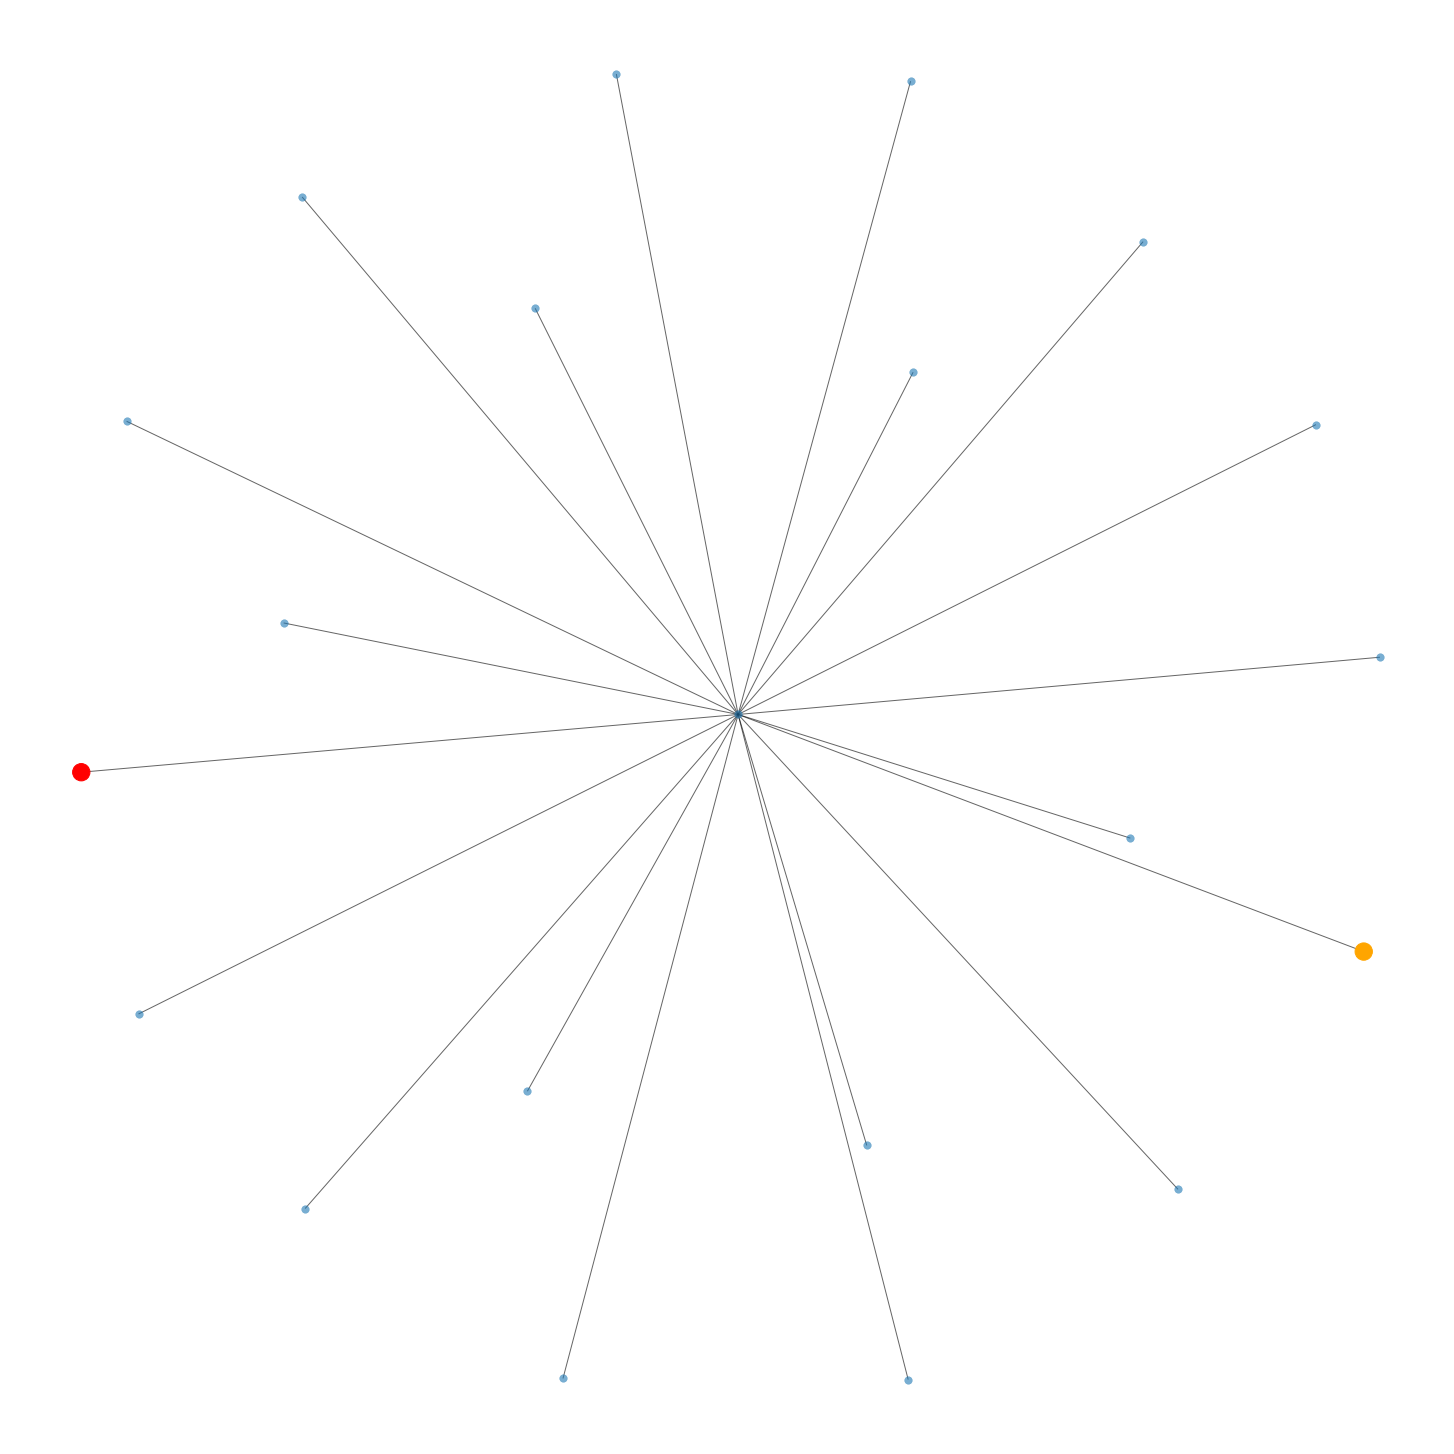

In [3]:
graph = GraphAnalysis(df)
graph.graph_viz()

In [13]:
print(f"There are {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges present in the Graph")

AttributeError: 'GraphAnalysis' object has no attribute 'number_of_nodes'

In [16]:
degrees = [val for (node, val) in graph.degree()]

In [19]:
print(f"The maximum degree of the Graph is {np.max(degrees)}")   
print(f"The minimum degree of the Graph is {np.min(degrees)}")

The maximum degree of the Graph is 15
The minimum degree of the Graph is 1


In [25]:
largest_subgraph = graph.subgraph(Gcc[0])
pos = nx.spring_layout(largest_subgraph, k=0.05)

In [28]:
graph_centrality = nx.degree_centrality(largest_subgraph)
max_de = max(graph_centrality.items(), key=itemgetter(1))
graph_closeness = nx.closeness_centrality(largest_subgraph)
max_clo = max(graph_closeness.items(), key=itemgetter(1))

print(f"the node with id {max_de[0]} has a degree centrality of {max_de[1]:.2f} which is the maximum of the Graph")
print(f"the node with id {max_clo[0]} has a closeness centrality of {max_clo[1]:.2f} which is the maximum of the Graph")

the node with id 1.2482033119178383e+18 has a degree centrality of 1.00 which is the maximum of the Graph
the node with id 1.2482033119178383e+18 has a closeness centrality of 1.00 which is the maximum of the Graph


In [34]:
print(graph_centrality)

{1.2482033119178383e+18: 1.0, 1248220393044881408: 0.06666666666666667, 1248217136222425088: 0.06666666666666667, 1248205671075586051: 0.06666666666666667, 1248217792358371329: 0.06666666666666667, 1248214261064744960: 0.06666666666666667, 1248211237177044992: 0.06666666666666667, 1248207544578789377: 0.06666666666666667, 1248207313305047040: 0.06666666666666667, 1248206484829286403: 0.06666666666666667, 1248205864638562304: 0.06666666666666667, 1248205146003312641: 0.06666666666666667, nan: 0.06666666666666667, nan: 0.06666666666666667, nan: 0.06666666666666667, 1248204912049209344: 0.06666666666666667}


In [38]:
node_and_degree = largest_subgraph.degree()
colors_central_nodes = ['orange', 'red']
central_nodes = [1248220393044881408, 1248217136222425088]

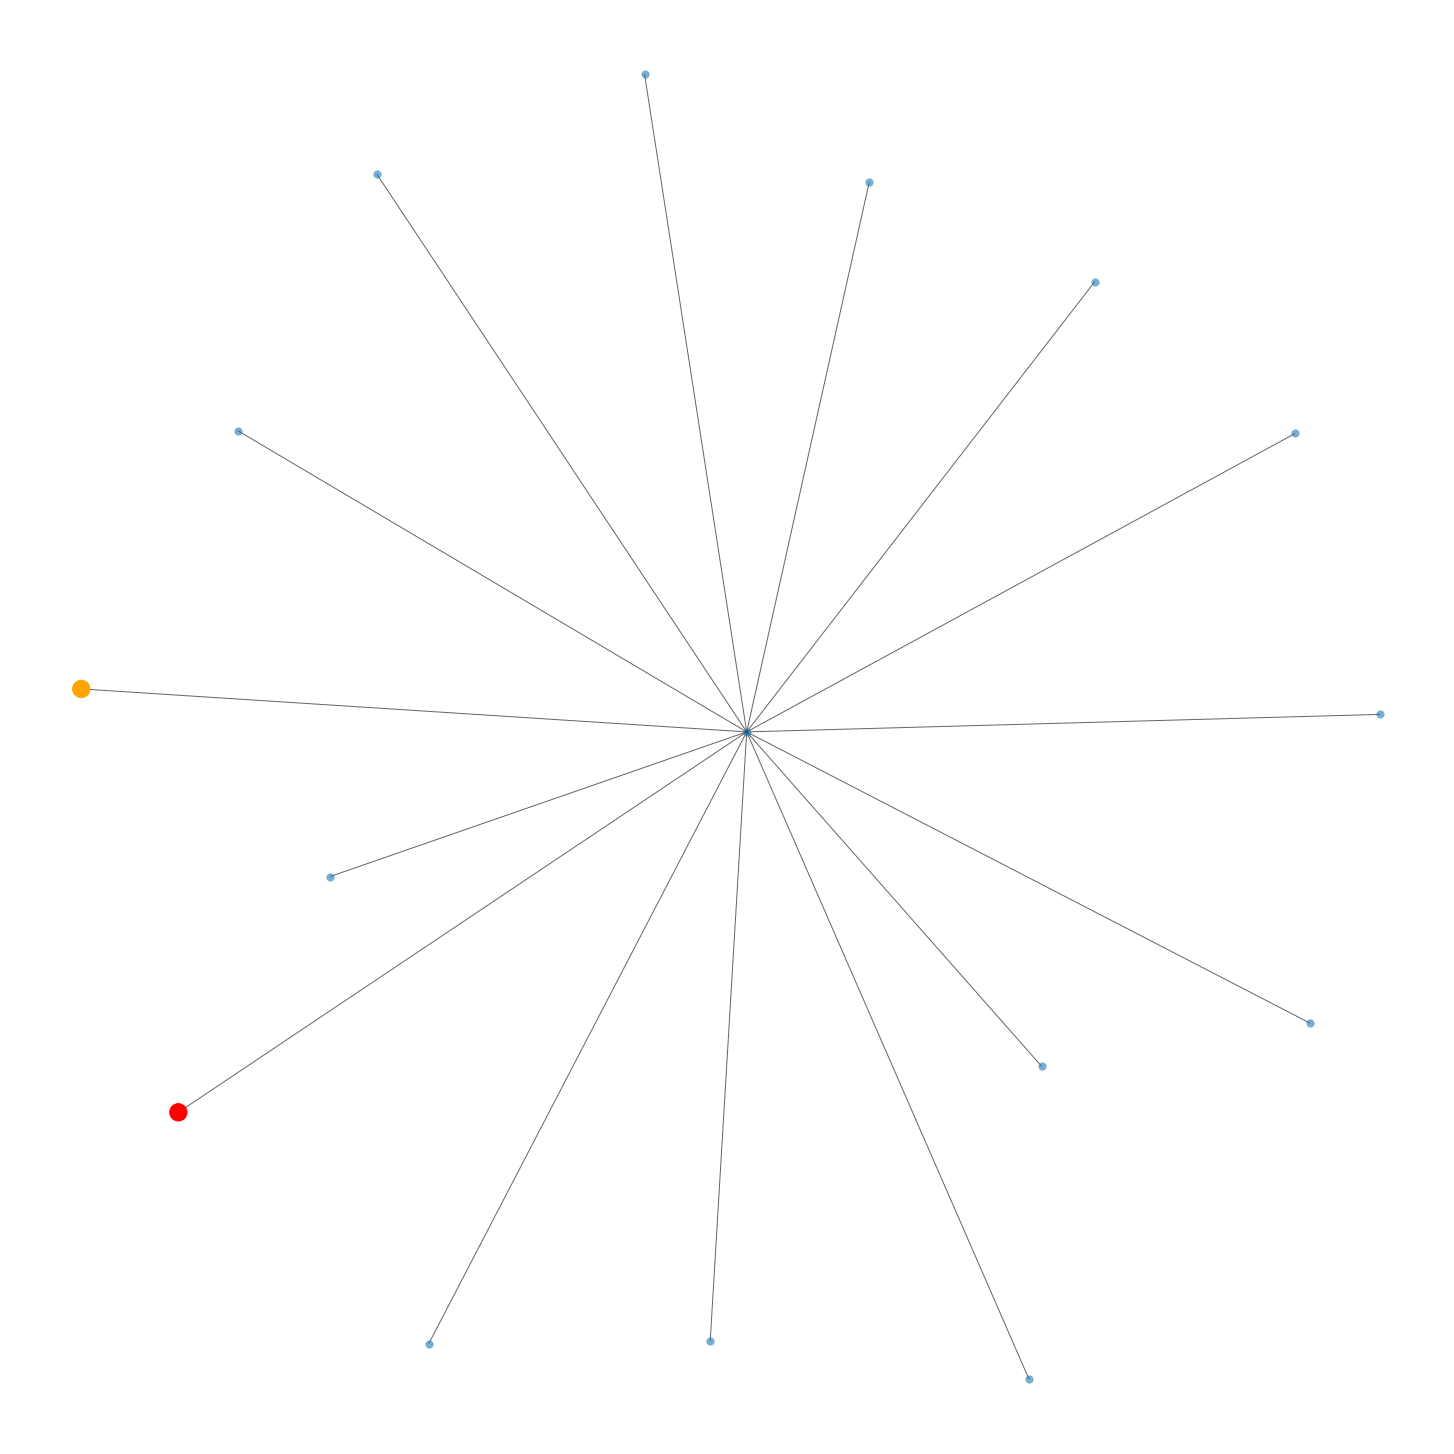

In [39]:
plt.figure(figsize = (20,20))
#node_color=range(1404),
nx.draw(largest_subgraph, pos=pos,  cmap=plt.cm.PiYG, edge_color="black", \
        linewidths=0.3, node_size=60, alpha=0.6, with_labels=False)
nx.draw_networkx_nodes(largest_subgraph, pos=pos, nodelist=central_nodes, node_size=300, node_color=colors_central_nodes)
#plt.savefig('graphfinal.png')
plt.show()